# Customer Clustering and Segmentation for a British Retail Chain

In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv("/Users/abdullahmunir/Desktop/All_projects/Projects/Online Retail/Online Retail.csv")

In [3]:
# Little overview of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Checking column headings
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
# Checking Missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Since Customer ID is essential for customer segmentation, we will drop null value rows
df.dropna(subset = ['CustomerID'], inplace = True)

In [7]:
# Getting overview of data
df.tail(60)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541849,581580,22894,TABLECLOTH RED APPLES DESIGN,2,09/12/2011 12:20,9.95,12748.0,United Kingdom
541850,581580,22704,WRAP RED APPLES,25,09/12/2011 12:20,0.42,12748.0,United Kingdom
541851,581580,22721,SET OF 3 CAKE TINS SKETCHBOOK,1,09/12/2011 12:20,1.95,12748.0,United Kingdom
541852,581580,22816,CARD MOTORBIKE SANTA,24,09/12/2011 12:20,0.42,12748.0,United Kingdom
541853,581580,85049E,SCANDINAVIAN REDS RIBBONS,2,09/12/2011 12:20,1.25,12748.0,United Kingdom
541854,581580,22075,6 RIBBONS ELEGANT CHRISTMAS,2,09/12/2011 12:20,0.39,12748.0,United Kingdom
541855,581580,21351,CINAMMON & ORANGE WREATH,1,09/12/2011 12:20,6.75,12748.0,United Kingdom
541856,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,09/12/2011 12:20,2.95,12748.0,United Kingdom
541857,581580,22567,20 DOLLY PEGS RETROSPOT,1,09/12/2011 12:20,1.45,12748.0,United Kingdom
541858,581580,79321,CHILLI LIGHTS,2,09/12/2011 12:20,5.75,12748.0,United Kingdom


In [8]:
# More EDA
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# Checking unique values for categorical columns

print(df['CustomerID'].nunique())
print(df['InvoiceNo'].nunique())

4372
22190


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
# Since some invoices start with C (as in, cancelled, we will remove those rows)
df = df[~df['InvoiceNo'].str.startswith('C', na=False)]

In [12]:
# Checkign for duplicates
df.duplicated().sum()

5192

In [13]:
# Removing Duplicates
df.drop_duplicates(inplace = True)

In [14]:
df.duplicated().sum()
# Success, there are no more duplicates 

0

In [15]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [16]:
# Since there is no total spending column, we will add iot
df['TotalSpending'] = df['Quantity'] * df["UnitPrice"]

In [17]:
df['TotalSpending']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalSpending, Length: 392732, dtype: float64

### Now we have a mostly clean dataset to work with
Next, we will go on to Clustering the Customers into meaningful buying groups based on their purchase behaviors
The most common appraoch is RFM analysis. it is based on three main factors:

	1.	Recency: How recently a customer made a purchase.
	2.	Frequency: How often a customer makes a purchase.
	3.	Monetary: How much money the customer spends.


In [18]:
# Creating a new rfm table

import datetime as dt
# Convert invoice date into datetime object 
df["InvoiceDate"] = pd.to_datetime(df['InvoiceDate'], errors = 'coerce')

# SSetting reference date
reference_date = df['InvoiceDate'].max() + dt.timedelta(days = 1)

# calculating recency - days since the last purchase
rfm = df.groupby("CustomerID").agg({'InvoiceDate' : lambda x: (reference_date - x.max()).days})



In [19]:
# Adding Frequency 

rfm['Frequency'] = df.groupby("CustomerID")['InvoiceNo'].nunique()

In [20]:
# Monetary

rfm['Monetary'] = df.groupby("CustomerID")['TotalSpending'].sum()

In [21]:
# Checking rfm table
rfm.head(10)

,InvoiceDate,Frequency,Monetary
CustomerID,,,
12346.0,NaN,1,77183.60
12347.0,96.0,7,4310.00
12348.0,221.0,4,1797.24
12349.0,NaN,1,1757.55
12350.0,312.0,1,334.40
12352.0,275.0,8,2506.04
12353.0,NaN,1,89.00
12354.0,NaN,1,1079.40
12355.0,97.0,1,459.40


In [22]:
# Renaming invoicedate to recency

rfm.rename(columns = {"InvoiceDate":"Recency"}, inplace = True)

In [23]:
rfm.isnull().sum()

Recency      1342
Frequency       0
Monetary        0
dtype: int64

In [24]:
# Handling null recency date:
rfm = rfm.dropna(subset=['Recency'])

#### Now before continuing with the clustering, we need to scale the entries

In [25]:
# Checking Missing values
rfm.isnull().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(rfm)

In [27]:
scaled_rfm

array([[-0.42361485,  0.16991438,  0.15357976],
       [ 0.46845591, -0.16379033, -0.08242643],
       [ 1.11788343, -0.49749504, -0.21982089],
       ...,
       [ 0.43990965, -0.38626014, -0.23450576],
       [-0.67339466,  1.1710285 , -0.05910626],
       [-1.10158863, -0.27502524, -0.07866575]])

Text(0, 0.5, 'Within Cluster Sum of Scores')

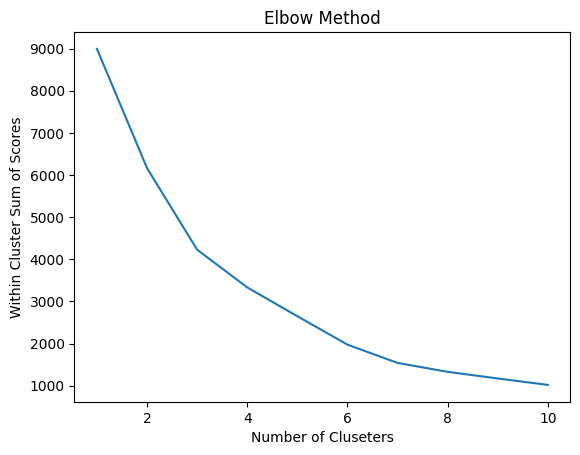

In [28]:
# Determining the optimal number of clusters for KMeans 

# Method 1: Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method uses sum of squares within the cluster to fiund optimal number of clusters
x = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(scaled_rfm)
    x.append(kmeans.inertia_)

# Plotting the elbow graph:

plt.plot(range(1,11), x)
plt.title("Elbow Method")
plt.xlabel("Number of Cluseters")
plt.ylabel("Within Cluster Sum of Scores")


According to the Elbow plot, 4 clusters is the optimal number of clusters. But there is another meathod as well, which we will try next just ot be sure

In [29]:
# Using silhoutte score
from sklearn.metrics import silhouette_score

# Test silhouette scores for different cluster numbers
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_rfm)
    silhouette_avg = silhouette_score(scaled_rfm, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.9066334556807212
For n_clusters = 3, the silhouette score is 0.46259915671777585
For n_clusters = 4, the silhouette score is 0.4231738998058068
For n_clusters = 5, the silhouette score is 0.42778009344209056
For n_clusters = 6, the silhouette score is 0.468425741415155
For n_clusters = 7, the silhouette score is 0.47264180652262305
For n_clusters = 8, the silhouette score is 0.41864685896146536
For n_clusters = 9, the silhouette score is 0.42625167668573427
For n_clusters = 10, the silhouette score is 0.4223694110191856


#### Using info from both scores we will use 4 clusters

In [30]:
# Applying KMeans clustering
# Fit K-Means with the optimal number of clusters
optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(scaled_rfm)

# View the clusters assigned to each customer
print(rfm.head())

            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12347.0        96.0          7   4310.00        3
12348.0       221.0          4   1797.24        3
12350.0       312.0          1    334.40        2
12352.0       275.0          8   2506.04        2
12355.0        97.0          1    459.40        3


In [31]:
# Now calculating average recency, frequency and monetary scores
cluster_summary = rfm.groupby("Cluster").mean


In [32]:
print(cluster_summary())

            Recency  Frequency       Monetary
Cluster                                      
0         43.747475  22.601010   12405.582323
1         24.000000  82.692308  127187.959231
2        357.369186   2.574128     865.067340
3        100.459962   4.327931    1578.439052


#### This Cluster Summary helps us understand the following:
	•	Recency: Low values indicate that customers have purchased recently.
	•	Frequency: High values indicate that customers make frequent purchases.
	•	Monetary: High values indicate that customers spend a lot.


#### Cluster 0: Engaged, Frequent Buyers

	•	Recency: 43.75 → These customers have made a purchase relatively recently (about 44 days ago on average).
	•	Frequency: 22.6 → They purchase quite frequently, averaging over 22 purchases.
	•	Monetary: 12,405.58 → They have spent a considerable amount, indicating they are relatively valuable customers.

##### Insight: These customers are loyal, frequent purchasers who make steady purchases and contribute significantly to revenue. They are engaged, but might benefit from special offers to maintain or increase their purchasing frequency.

#### Cluster 1: High-Value, Highly Engaged VIP Customers

	•	Recency: 24 → These customers have made a very recent purchase, around 24 days ago.
	•	Frequency: 82.7 → This is an extremely high number of purchases, indicating they are frequent shoppers.
	•	Monetary: 127,187.96 → These are the highest-value customers by far, spending over 127,000 on average.

##### Insight: This is your VIP segment—high-value, frequent, and recently engaged customers. They are the most important customers to the business, driving a large share of revenue. VIP programs, exclusive offers, or early access to new products could help retain and reward these customers.

#### Cluster 2: At-Risk or Inactive Customers

	•	Recency: 357.37 → These customers haven’t made a purchase in almost a year (357 days), which indicates they are at risk of churn or already inactive.
	•	Frequency: 2.57 → They’ve made very few purchases, averaging just over 2 purchases.
	•	Monetary: 865.07 → Their total spending is low, indicating they are not high-value customers.

##### Insight: These customers are likely at-risk or dormant. They have been inactive for a long time and are unlikely to make future purchases unless re-engaged. Consider win-back campaigns, discounts, or personalized outreach to try and re-engage these customers.

#### Cluster 3: Low-Value, Infrequent Buyers

	•	Recency: 100.46 → These customers last purchased about 100 days ago, meaning they are not very recently active.
	•	Frequency: 4.33 → They make infrequent purchases, averaging just over 4 purchases.
	•	Monetary: 1,578.44 → They are not major spenders, contributing relatively low monetary value.

##### Insight: These are low-value, infrequent customers. While they are not completely inactive, they don’t engage with the business frequently, and their spending is low. Targeted promotions or encouragement to increase their purchase frequency might help move them toward becoming more engaged, valuable customers.


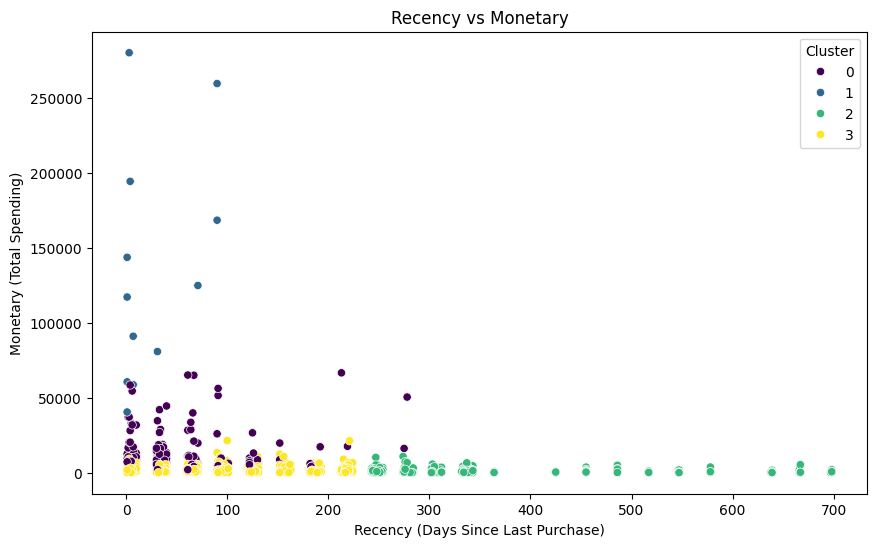

In [40]:
# Now visualiing clusters
# Recency vs Monetary

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Recency vs Monetary')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Monetary (Total Spending)')
plt.show()


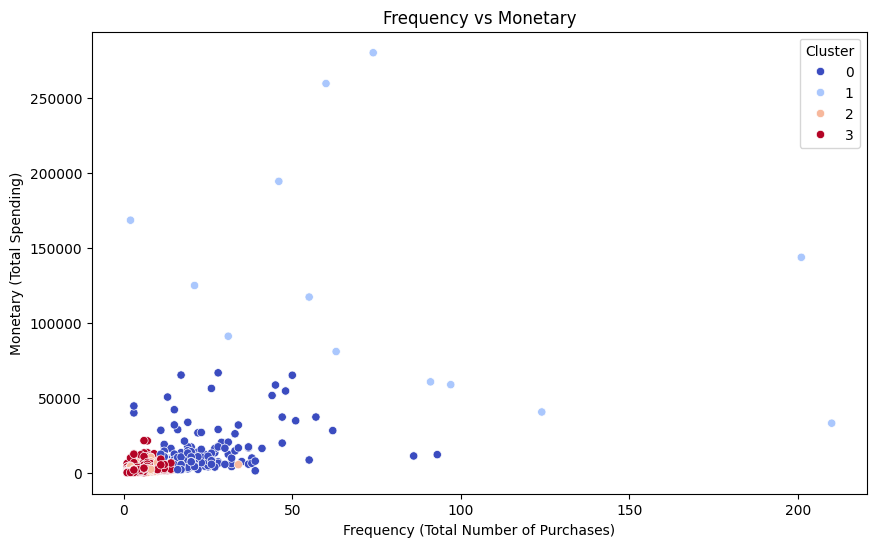

In [39]:
# Frequency vs Monetary

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='coolwarm')
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency (Total Number of Purchases)')
plt.ylabel('Monetary (Total Spending)')
plt.show()

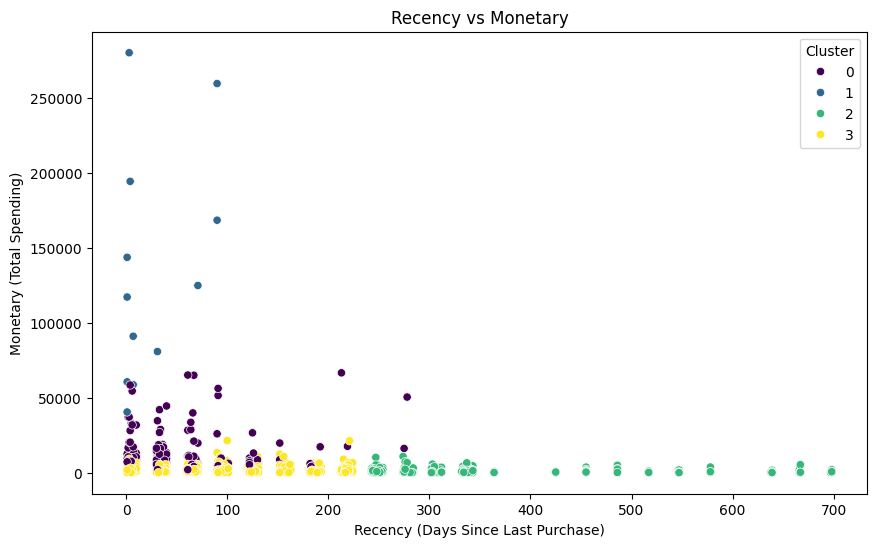

In [41]:
# Recency vs Monetary

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Recency vs Monetary')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Monetary (Total Spending)')
plt.show()

### Next Steps:

	•	Develop tailored marketing strategies:
	•	VIP customers (Cluster 1): Loyalty programs, exclusive deals, VIP access.
	•	Engaged frequent buyers (Cluster 0): Personalized offers to maintain or slightly increase engagement.
	•	At-risk customers (Cluster 2): Win-back campaigns with heavy discounts.
	•	Low-value customers (Cluster 3): Promotions or deals to increase purchase frequency and total spend.
	•	Use segmentation to create custom campaigns based on the needs of each cluster, focusing on maximizing revenue from the most valuable segments and re-engaging the inactive ones.